In [1]:
import tensorflow as tf

In [2]:
( x_train, y_train ), ( x_test, y_test ) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical( y_train, 10 )
y_test = tf.keras.utils.to_categorical( y_test, 10 )

print( x_train.shape, y_train.shape )

(50000, 32, 32, 3) (50000, 10)


In [3]:
learning_rate = 0.001
training_epochs = 25
batch_size = 512

In [4]:
m1 = tf.keras.Sequential()

In [5]:
# layer 1
m1.add( tf.keras.layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ],
                               padding = 'SAME', activation = 'relu' ) )
m1.add( tf.keras.layers.MaxPooling2D( pool_size = [ 2, 2 ],
                                    padding = 'SAME', strides = 2 ) )
m1.add( tf.keras.layers.Dropout( 0.3 ) )

# layer 2
m1.add( tf.keras.layers.Conv2D( filters = 64, kernel_size = [ 3, 3 ],
                              padding = 'SAME', activation = 'relu' ) )
m1.add( tf.keras.layers.MaxPooling2D( pool_size = [ 2, 2 ],
                                    padding = 'SAME', strides = 2 ) )
m1.add( tf.keras.layers.Dropout( 0.3 ) )

# layer 3
m1.add( tf.keras.layers.Conv2D( filters = 128, kernel_size = [ 3, 3 ],
                              padding = 'SAME', activation = 'relu' ) )
m1.add( tf.keras.layers.MaxPooling2D( pool_size = [ 2, 2 ],
                                    padding = 'SAME', strides = 2 ) )
m1.add( tf.keras.layers.Dropout( 0.3 ) )

# Fully connected Layer
m1.add( tf.keras.layers.Flatten() )
m1.add( tf.keras.layers.Dense( 256, activation = 'relu' ) )
m1.add( tf.keras.layers.Dropout( 0.5 ) )

# Output Layer
m1.add( tf.keras.layers.Dense( units = 10, activation = 'softmax' ) )

In [6]:
m1.compile( loss = 'categorical_crossentropy',
           optimizer = tf.keras.optimizers.Adam( learning_rate ),
           metrics = [ 'acc' ] )

history = m1.fit( x_train, y_train, batch_size = batch_size,
                 epochs = training_epochs, validation_split = 0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 4s 89us/sample - loss: 2.0146 - acc: 0.2531 - val_loss: 1.7264 - val_acc: 0.3859
Epoch 2/25
40000/40000 [==============================] - 2s 49us/sample - loss: 1.6533 - acc: 0.3957 - val_loss: 1.4876 - val_acc: 0.4788
Epoch 3/25
40000/40000 [==============================] - 2s 49us/sample - loss: 1.4866 - acc: 0.4556 - val_loss: 1.3797 - val_acc: 0.5121
Epoch 4/25
40000/40000 [==============================] - 2s 49us/sample - loss: 1.3964 - acc: 0.4953 - val_loss: 1.2722 - val_acc: 0.5583
Epoch 5/25
40000/40000 [==============================] - 2s 49us/sample - loss: 1.3245 - acc: 0.5230 - val_loss: 1.2098 - val_acc: 0.5788
Epoch 6/25
40000/40000 [==============================] - 2s 49us/sample - loss: 1.2607 - acc: 0.5500 - val_loss: 1.1325 - val_acc: 0.6054
Epoch 7/25
40000/40000 [==============================] - 2s 49us/sample - loss: 1.2021 - acc: 0.5738 - val_loss: 1.

In [7]:
evaluation = m1.evaluate( x_test, y_test )
print( 'loss: {:.9f}, Accuracy: {:.2f}%'.format( evaluation[0], evaluation[1] * 100 ) )

10000/10000 [==============================] - 1s 71us/sample - loss: 0.7644 - acc: 0.7331
loss: 0.764423293, Accuracy: 73.31%


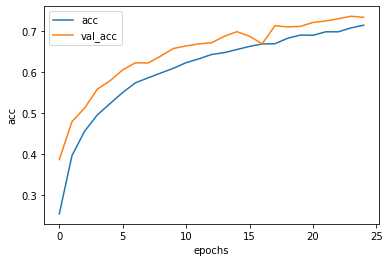

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'])
plt.xlabel( 'epochs' )
plt.ylabel( 'acc' )
plt.legend( ['acc', 'val_acc'] )

plt.savefig('basicCNN.png')
plt.show()